# Fermi Surface

Here code examples for Fermi surfaces are given. Fermi surfaces are band structures in 3D, i.e. distributions of $E(k)$ in the first Brillouin zone (1BZ). Therefore methods are similar to band structures, i.e. projections of $E(k)$ along the high symmetry lines of 1BZ. For band structures, please refer to the [Electronic Structure examples](https://crystal-code-tools.github.io/CRYSTALpytools/examples/electronic_structure/electronic_structure.html).

**NOTE**

For 3D and 2D systems only.

## The 'read_Fermi_surface()' method

This method is defined in the `crystal_io.Properties_output` class. The fort.35 file generated by the 'DLV_BAND' keyword, which specifies the min and max band numbers and the size of k mesh.

The screen output ('out' or 'outp') is strongly suggested to get Fermi energy. Otherwise the data in fort.35 is used, rather than the energy aligned to $E_{F}=0$.

$E(k)$ is saved by a grid defined in reciprocal unit cell, rather than the grid defined in 1BZ.

In [2]:
from CRYSTALpytools.crystal_io import Properties_output

fsurf = Properties_output('fsurf_NaCl.out').read_Fermi_surface('fsurf_NaCl.f35')

print('NaCl Fermi energy = {:.2f} {}'.format(fsurf.efermi, fsurf.unit))
print('NaCl grid size = Z {:d} Y {:d} X {:d}'.format(fsurf.bands.shape[1],
                                                     fsurf.bands.shape[2],
                                                     fsurf.bands.shape[3]))
print('NaCl nband = {:d}'.format(fsurf.bands.shape[0]))
print('NaCl spin = {:d}'.format(fsurf.bands.shape[-1]))

NaCl Fermi energy = -6.59 eV
NaCl grid size = Z 24 Y 24 X 24
NaCl nband = 30
NaCl spin = 1


For spin-polarized cases, the last dimension is doubled.

In [3]:
from CRYSTALpytools.crystal_io import Properties_output

f2D = Properties_output('fsurf_GMV.out').read_Fermi_surface('fsurf_GMV.f35')

print('MV graphene Fermi energy = {:.2f} {}'.format(f2D.efermi, f2D.unit))
print('MV graphene grid size = Z {:d} Y {:d} X {:d}'.format(f2D.bands.shape[1],
                                                            f2D.bands.shape[2],
                                                            f2D.bands.shape[3]))
print('MV graphene nband = {:d}'.format(f2D.bands.shape[0]))
print('MV graphene spin = {:d}'.format(f2D.bands.shape[-1]))

MV graphene Fermi energy = -2.78 eV
MV graphene grid size = Z 1 Y 24 X 24
MV graphene nband = 10
MV graphene spin = 2


## The 'electronics.FermiSurface' class

This class includes object-oriented methods for data analysis and quick plotting.

### The 'get_bandgap()' method and 'bandgap' attribute

Similar to `electronics.ElectronBand` class, this attribute gets VBM, CBM and band gap from $E_{k}$.

In [1]:
from CRYSTALpytools.electronics import FermiSurface

fsurf = FermiSurface.from_file('fsurf_NaCl.f35', 'fsurf_NaCl.out')
print('NaCl band gap = {:.2f} {}'.format(fsurf.bandgap, fsurf.unit))

_, _, _, pos = fsurf.get_bandgap()
print('VBM position: X {:.4f} Y {:.4f} Z {:.4f}'.format(pos[0, 0], pos[0, 1], pos[0, 2]))
print('CBM position: X {:.4f} Y {:.4f} Z {:.4f}'.format(pos[1, 0], pos[1, 1], pos[1, 2]))

NaCl band gap = 11.70 eV
VBM position: X 1.0699 Y 1.0699 Z 1.0699
CBM position: X -0.0465 Y 0.5117 Z 1.0699


For spin-polarized cases, this method returns to VBM/CBM of $\alpha$ and $\beta$ states separately.

In [9]:
from CRYSTALpytools.electronics import FermiSurface

f2D = FermiSurface.from_file('fsurf_GMV.f35', 'fsurf_GMV.out')
print('MV graphene alpha band gap = {:.2f} {}'.format(f2D.bandgap[0], f2D.unit))

_, vbm, cbm, _ = f2D.get_bandgap()
print('Alpha VBM = {:.4f} {}'.format(vbm[0], f2D.unit))
print('Beta CBM = {:.4f} {}'.format(cbm[1], f2D.unit))

MV graphene alpha band gap = 1.80 eV
Alpha VBM = -0.0340 eV
Beta CBM = 0.3848 eV


### The 'to_bxsf()' method

This method writes data into the BXSF formatted file used by [XCrySDen's Fermi surface viewer](http://www.xcrysden.org/doc/fermi.html). Currently only 3D systems are supported by BXSF format.

Use the `band_index` option (starting from 1) to specify the band to dump. For spin-polarized systems, attach 'a' or 'b' for $\alpha$ or $\beta$ states.

In [1]:
from CRYSTALpytools.electronics import FermiSurface

fsurf = FermiSurface.from_file('fsurf_NaCl.f35', 'fsurf_NaCl.out')
fsurf.to_bxsf('fsurf_NaCl.bxsf', band_index=['vb', 'cb'])

Visualize the valance band in XCrySDen. The isosurface of -0.5 eV below $E_{F}$ is plotted.

<img src="./fsurf_NaCl_BXSF.png" width="640">

## Visualization

The `electronics.FermiSurface.plot()` method plots:

1. For 3D systems, isosurfaces of $E(k)$, which is plotted as 3D isosurfaces.  
2. For 2D systems, the distribution of $E(k)$, which is plotted as the 3D surface, with XY plane as 1BZ and Z axis as energy.

**NOTE**
1. [MayaVi](https://docs.enthought.com/mayavi/mayavi/index.html) is required for plotting, which is not installed by default.  
2. Currently it is the only visualization method of CRYSTALpytools. There is no similar methods available in the `plot` module.

### 3D systems

It plots 1 or more isosurfaces of the same band structure. Though in principle the user can also specify multiple bands with `band_index` and the same `isovalue` entry is applied to all the bands, it is not recommended and rarely tested.

In [3]:
from CRYSTALpytools.electronics import FermiSurface

fsurf = FermiSurface.from_file('fsurf_NaCl.f35', 'fsurf_NaCl.out')
fsurf.plot('vb', isovalue=[-0.3, -0.5, -0.7], interp='slinear', interp_size=2,
           BZ_linewidth=0.5, BZ_color=(0.5, 0.5, 0.5))

Displayed in the pop-up window of MayaVi.

<img src="./fsurf_NaCl.png" width="480">

### 2D systems

For 2D systems, it is possible to plot multiple bands at the same time. `isovalue` is ignored.

In [4]:
from CRYSTALpytools.electronics import FermiSurface

fsurf = FermiSurface.from_file('fsurf_GMV.f35', 'fsurf_GMV.out')
fsurf.plot(['5a', '5b', '6a', '6b'], colormap='jet',
            interp='slinear', interp_size=3, BZ_scale=1.5)

Displayed in the pop-up window of MayaVi.

(-0.5, 628.5, 425.5, -0.5)

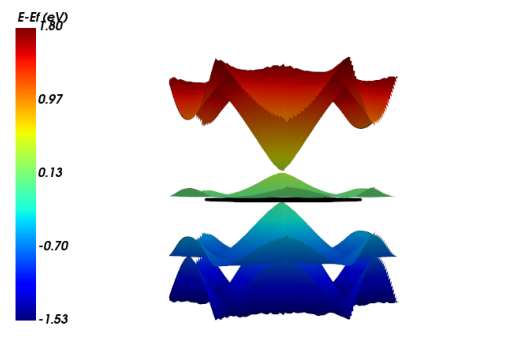

In [1]:
# This code block is only used to generate a thumbnail for the example gallary.
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(plt.imread("./fsurf_GMV.png"))
ax.axis('off')

For more information, please refer to [the API documentations](https://crystal-code-tools.github.io/CRYSTALpytools/crystalpytools.electronics.html).